In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv('C:/Users/User/Desktop/taxi_trip_pricing.csv')

array([[<Axes: title={'center': 'Trip_Distance_km'}>,
        <Axes: title={'center': 'Passenger_Count'}>,
        <Axes: title={'center': 'Base_Fare'}>],
       [<Axes: title={'center': 'Per_Km_Rate'}>,
        <Axes: title={'center': 'Per_Minute_Rate'}>,
        <Axes: title={'center': 'Trip_Duration_Minutes'}>],
       [<Axes: title={'center': 'Trip_Price'}>, <Axes: >, <Axes: >]],
      dtype=object)

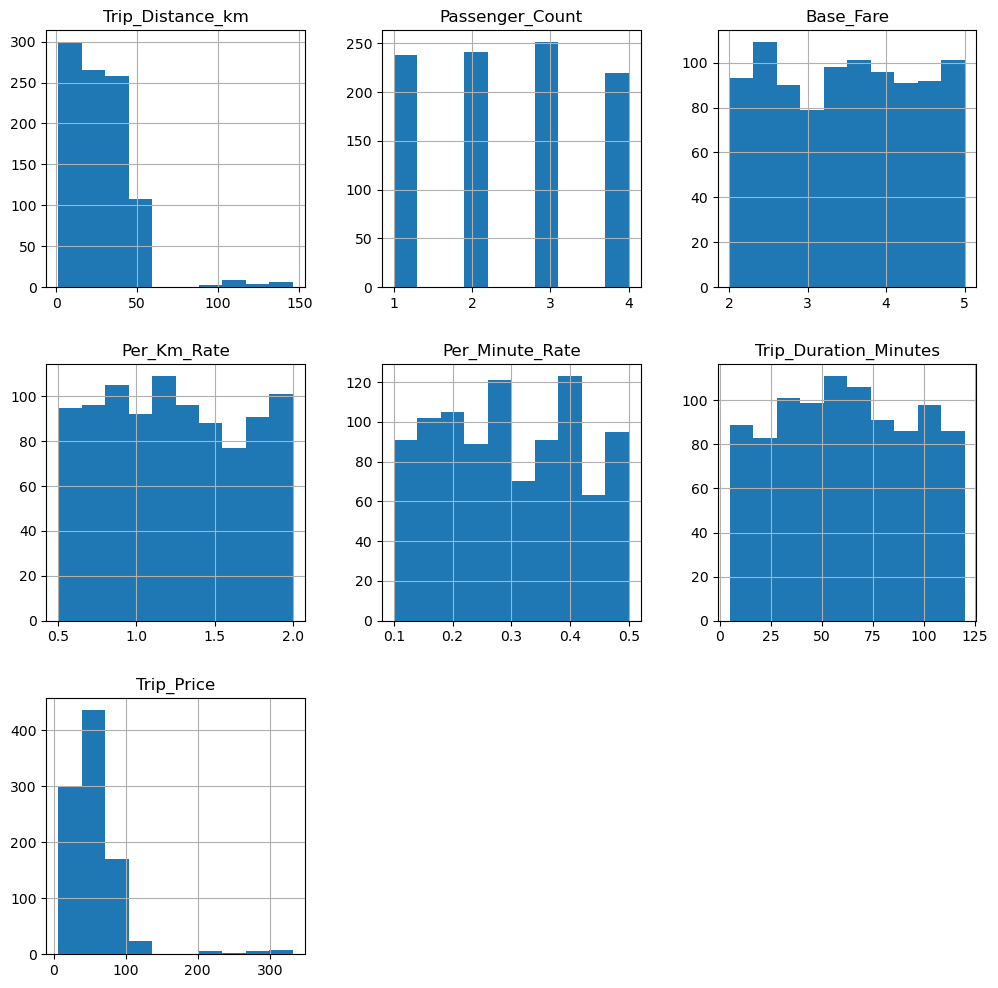

In [93]:
plt.rcParams['figure.figsize'] = [12, 12]
df.hist()

In [4]:
df.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


In [9]:
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [5]:
df.dtypes

Trip_Distance_km         float64
Time_of_Day               object
Day_of_Week               object
Passenger_Count          float64
Traffic_Conditions        object
Weather                   object
Base_Fare                float64
Per_Km_Rate              float64
Per_Minute_Rate          float64
Trip_Duration_Minutes    float64
Trip_Price               float64
dtype: object

In [4]:
print(df['Time_of_Day'].unique())
print(df['Day_of_Week'].unique())
print(df['Traffic_Conditions'].unique())
print(df['Weather'].unique())

['Morning' 'Afternoon' 'Evening' 'Night' nan]
['Weekday' 'Weekend' nan]
['Low' 'High' 'Medium' nan]
['Clear' nan 'Rain' 'Snow']


In [4]:
df['Time_of_Day'] = df['Time_of_Day'].map({'Night': 3,'Morning': 2, 'Afternoon': 1, 'Evening': 0}).astype(float)
df['Day_of_Week'] = df['Day_of_Week'].map({'Weekday': 1, 'Weekend': 0}).astype(float)
df['Traffic_Conditions'] = df['Traffic_Conditions'].map({'Low': 2, 'High': 1, 'Medium': 0}).astype(float)
df['Weather'] = df['Weather'].map({'Clear': 2, 'Rain': 1, 'Snow': 0}).astype(float)

In [5]:
df.dtypes

Trip_Distance_km         float64
Time_of_Day              float64
Day_of_Week              float64
Passenger_Count          float64
Traffic_Conditions       float64
Weather                  float64
Base_Fare                float64
Per_Km_Rate              float64
Per_Minute_Rate          float64
Trip_Duration_Minutes    float64
Trip_Price               float64
dtype: object

In [6]:
df.isna().sum()

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

In [7]:
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,2.0,1.0,3.0,2.0,2.0,3.56,0.80,0.32,53.82,36.2624
1,47.59,1.0,1.0,1.0,1.0,2.0,NaN,0.62,0.43,40.57,NaN
2,36.87,0.0,0.0,1.0,1.0,2.0,2.70,1.21,0.15,37.27,52.9032
3,30.33,0.0,1.0,4.0,2.0,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,0.0,1.0,3.0,1.0,2.0,2.93,0.63,0.32,22.64,15.6180


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    float64
 2   Day_of_Week            950 non-null    float64
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    float64
 5   Weather                950 non-null    float64
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(11)
memory usage: 86.1 KB


In [5]:
columns_to_fill = ['Trip_Distance_km', 'Time_of_Day', 'Day_of_Week', 'Passenger_Count', 'Traffic_Conditions', 'Weather', 'Base_Fare', 'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price']
for col in columns_to_fill:
    df[col] = df[col].fillna(df[col].mean())

In [9]:
df.isna().sum()

Trip_Distance_km         0
Time_of_Day              0
Day_of_Week              0
Passenger_Count          0
Traffic_Conditions       0
Weather                  0
Base_Fare                0
Per_Km_Rate              0
Per_Minute_Rate          0
Trip_Duration_Minutes    0
Trip_Price               0
dtype: int64

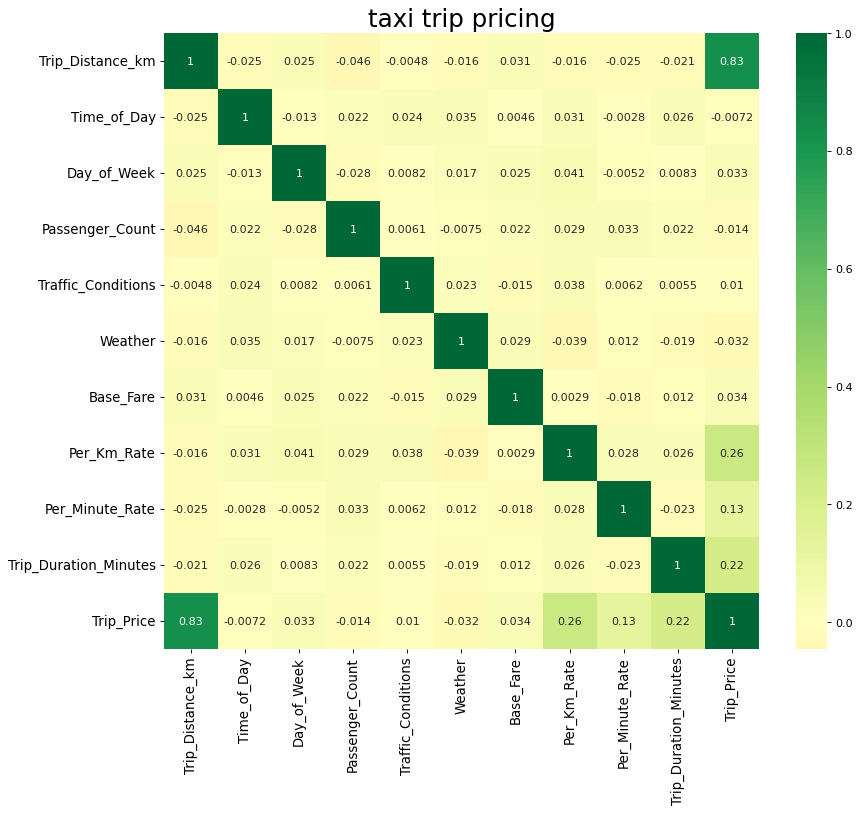

In [10]:
heatdf = df
plt.figure(figsize = (12,10), dpi = 80)
sns.heatmap(heatdf.corr(), xticklabels = heatdf.corr().columns, yticklabels = heatdf.corr().columns, cmap = 'RdYlGn', center = 0, annot = True)
plt.title('taxi trip pricing', fontsize = 22)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

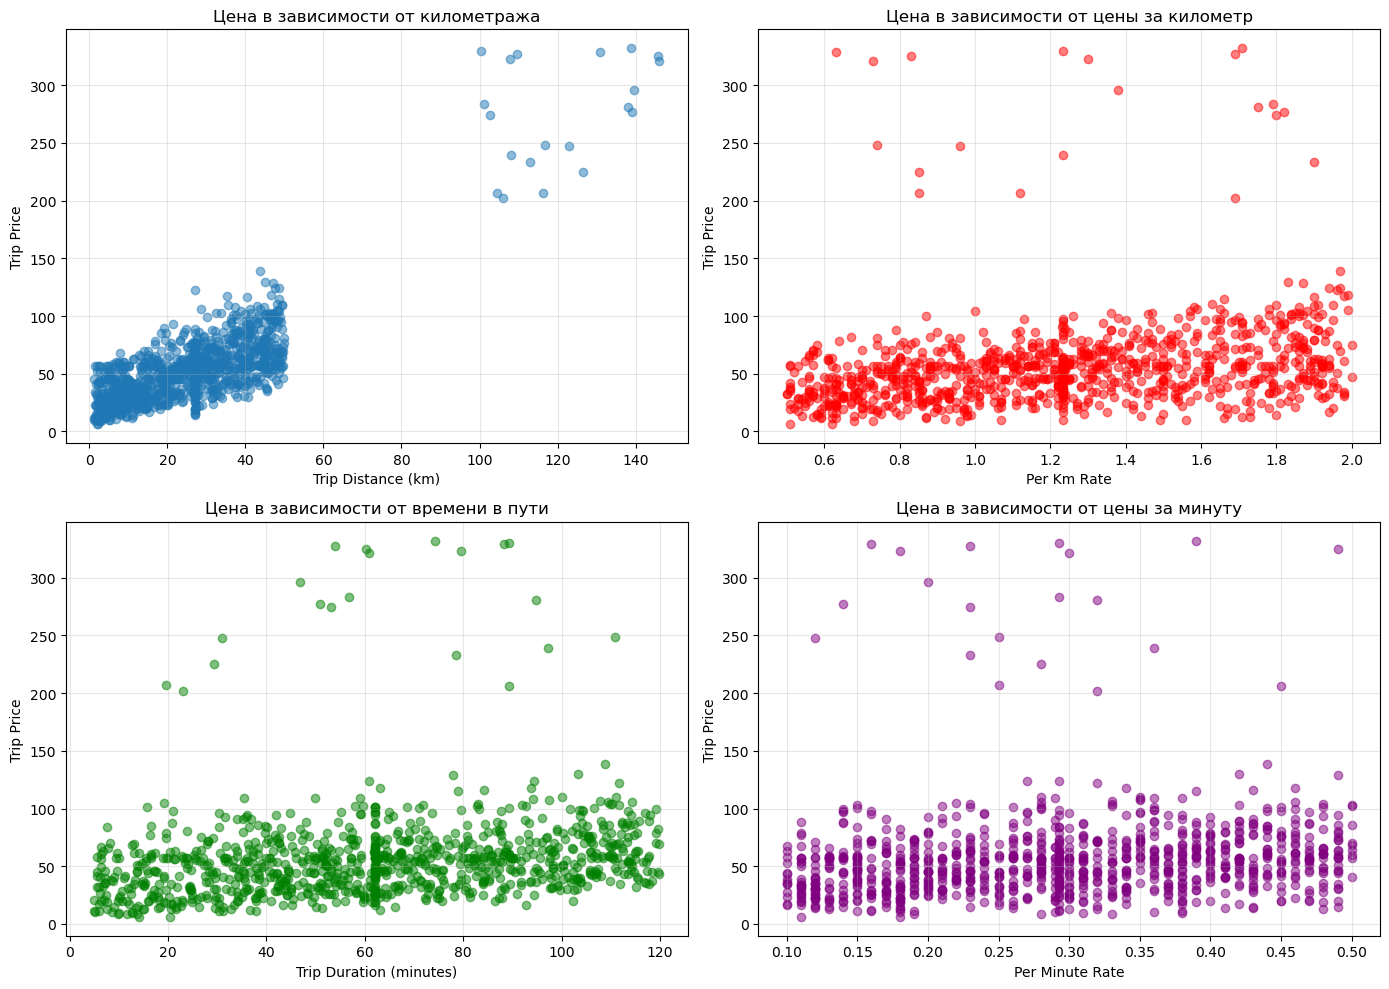

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].scatter(df['Trip_Distance_km'], df['Trip_Price'], alpha=0.5)
axes[0, 0].set_xlabel('Trip Distance (km)')
axes[0, 0].set_ylabel('Trip Price')
axes[0, 0].set_title('Цена в зависимости от километража')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].scatter(df['Per_Km_Rate'], df['Trip_Price'], alpha=0.5, color='red')
axes[0, 1].set_xlabel('Per Km Rate')
axes[0, 1].set_ylabel('Trip Price')
axes[0, 1].set_title('Цена в зависимости от цены за километр')
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].scatter(df['Trip_Duration_Minutes'], df['Trip_Price'], alpha=0.5, color='green')
axes[1, 0].set_xlabel('Trip Duration (minutes)')
axes[1, 0].set_ylabel('Trip Price')
axes[1, 0].set_title('Цена в зависимости от времени в пути')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].scatter(df['Per_Minute_Rate'], df['Trip_Price'], alpha=0.5, color='purple')
axes[1, 1].set_xlabel('Per Minute Rate')
axes[1, 1].set_ylabel('Trip Price')
axes[1, 1].set_title('Цена в зависимости от цены за минуту')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [7]:
# как считается цена!
# Trip_Distance_km * Per_Km_Rate + Per_Minute_Rate * Trip_Duration_Minutes + Base_Fare	
# => расстояние * цена за киллометр + время * цена за минуту + базовый тариф

In [6]:
from sklearn.compose import ColumnTransformer

df['Price_km'] = df['Trip_Distance_km'] * df['Per_Km_Rate']
df['Price_min'] = df['Trip_Duration_Minutes'] * df['Per_Minute_Rate']

df = df.drop(['Trip_Distance_km', 'Per_Km_Rate', 'Trip_Duration_Minutes', 'Per_Minute_Rate'], axis=1)

X = df.drop('Trip_Price', axis=1)
y = df['Trip_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

num_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist() #возвращаем все столбцы

ct = ColumnTransformer([('scaler', StandardScaler(), num_cols)], remainder='passthrough') 

X_train_transformed = ct.fit_transform(X_train)
X_test_transformed = ct.transform(X_test)


In [9]:
df.describe()

,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Trip_Price,Price_km,Price_min
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.28000,0.689474,2.476842,1.027368,1.643158,3.502989,56.874773,33.255001,18.114877
std,0.88561,0.451219,1.074311,0.876388,0.574770,0.848107,39.464810,28.028713,12.099411
min,0.00000,0.000000,1.000000,0.000000,0.000000,2.010000,6.126900,0.787400,0.791000
25%,1.00000,0.000000,2.000000,0.000000,1.000000,2.770000,34.578850,14.154750,8.884725
50%,1.00000,1.000000,2.476842,1.000000,2.000000,3.502989,52.617000,27.836532,15.133800
75%,2.00000,1.000000,3.000000,2.000000,2.000000,4.202500,67.476650,44.802900,25.407975
max,3.00000,1.000000,4.000000,2.000000,2.000000,5.000000,332.043689,253.093259,55.855000


In [28]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha = 1.0)  
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

lasso = Lasso(alpha = 1.0) 
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
print(f"MAE(Ridge): {mae_ridge:.4f}")
print(f"MAE(Lasso): {mae_lasso:.4f}")

MAE(Ridge): 5.8334
MAE(Lasso): 5.8870


In [50]:
mae_scorer = make_scorer(mean_absolute_error, greater_is_better = False)

cv_scores_ridge = cross_val_score(ridge, X_train, y_train, cv = 5, scoring = mae_scorer)
cv_scores_lasso = cross_val_score(lasso, X_train, y_train, cv = 5, scoring = mae_scorer)

print(f"MAE (Ridge.train) CV: среднее = {-cv_scores_ridge.mean():.4f}, std = {cv_scores_ridge.std():.4f}")
print(f"MAE (Lasso.train) CV: среднее = {-cv_scores_lasso.mean():.4f}, std = {cv_scores_lasso.std():.4f}")

MAE (Ridge.train) CV: среднее = 8.5169, std = 0.4796
MAE (Lasso.train) CV: среднее = 8.3133, std = 0.5209


In [49]:
mae_scorer = make_scorer(mean_absolute_error, greater_is_better = False)

cv_scores_ridge = cross_val_score(ridge, X_test, y_test, cv = 5, scoring = mae_scorer)
cv_scores_lasso = cross_val_score(lasso, X_test, y_test, cv = 5, scoring = mae_scorer)

print(f"MAE (Ridge.test) CV: среднее = {-cv_scores_ridge.mean():.4f}, std = {cv_scores_ridge.std():.4f}")
print(f"MAE (Lasso.test) CV: среднее = {-cv_scores_lasso.mean():.4f}, std = {cv_scores_lasso.std():.4f}")

MAE (Ridge.test) CV: среднее = 4.3265, std = 1.1249
MAE (Lasso.test) CV: среднее = 3.9222, std = 1.0855


In [48]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
mae_scorer = make_scorer(mean_absolute_error, greater_is_better = False)#greater_is_better - чем меньше значения, тем лучше

cv_scores = cross_val_score(model, X_train, y_train, cv = 5, scoring = mae_scorer)

print(f"MAE(Linear.train) CV: среднее = {-cv_scores.mean():.4f}, std = {cv_scores.std():.4f}")

cv_scores = cross_val_score(model, X_test, y_test, cv = 5, scoring = mae_scorer)

print(f"MAE(Linear.test) CV: среднее = {-cv_scores.mean():.4f}, std = {cv_scores.std():.4f}")

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_test)
print(f"MAE: {mae:.4f}")

MAE(Linear.train) CV: среднее = 8.5181, std = 0.4794
MAE(Linear.test) CV: среднее = 4.3353, std = 1.1292
MAE: 5.8334


In [47]:
from sklearn.svm import SVR

svr = SVR(kernel = 'rbf', C = 1.0, epsilon = 0.1)

mae_scorer = make_scorer(mean_absolute_error, greater_is_better = False)

cv_scores = cross_val_score(svr, X_train, y_train, cv = 5, scoring = mae_scorer)

print(f"MAE(SVR.train) CV: среднее = {-cv_scores.mean():.4f}, std = {cv_scores.std():.4f}")

cv_scores = cross_val_score(svr, X_test, y_test, cv = 5, scoring = mae_scorer)

print(f"MAE(SVR.test) CV: среднее = {-cv_scores.mean():.4f}, std = {cv_scores.std():.4f}")

svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

mae_svr = mean_absolute_error(y_test, y_pred_svr)
print(f"MAE: {mae_svr:.4f}")

MAE(SVR.train) CV: среднее = 9.2185, std = 1.5076
MAE(SVR.test) CV: среднее = 8.5725, std = 2.2501
MAE: 4.9238


In [46]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100, random_state = 42, n_jobs=-1)

mae_scorer = make_scorer(mean_absolute_error, greater_is_better = False)

cv_scores = cross_val_score(rf, X_train, y_train, cv = 5, scoring = mae_scorer)

print(f"MAE(RandomForest.train) CV: среднее = {-cv_scores.mean():.4f}, std = {cv_scores.std():.4f}")

cv_scores = cross_val_score(rf, X_test, y_test, cv = 5, scoring = mae_scorer)

print(f"MAE(RandomForest.test) CV: среднее = {-cv_scores.mean():.4f}, std = {cv_scores.std():.4f}")

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
mae = mean_absolute_error(y_test, rf_pred)
print(f"MAE: {mae:.4f}")



MAE(RandomForest.train) CV: среднее = 6.8905, std = 0.5642
MAE(RandomForest.test) CV: среднее = 6.1907, std = 1.7865
MAE: 5.6630


In [69]:
from sklearn.model_selection import KFold
from tensorflow.keras import regularizers

model = keras.Sequential([
    keras.Input(shape=(8,)),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    
scores = [] #CV
for train_idx, val_idx in KFold(n_splits = 3, shuffle=True, random_state=42).split(X_train):
    model.fit(
        X_train.iloc[train_idx] if hasattr(X_train, 'iloc') else X_train[train_idx],
        y_train.iloc[train_idx] if hasattr(y_train, 'iloc') else y_train[train_idx],
        epochs=50, batch_size=42, verbose=0)
    val_loss = model.evaluate(
        X_train.iloc[val_idx] if hasattr(X_train, 'iloc') else X_train[val_idx],
        y_train.iloc[val_idx] if hasattr(y_train, 'iloc') else y_train[val_idx],
        verbose=0)[1]
    scores.append(val_loss)

print(f"MAE(keras) CV: среднее = : {np.mean(scores):.4f}, std = {np.std(scores):.4f}")

model.fit(X_train, y_train, epochs = 100, batch_size = 42, validation_split = 0.2, verbose  = 0) 

y_pred = model.predict(X_test).flatten()
final_mae = mean_absolute_error(y_test, y_pred)

print(f'MAE: {final_mae:.4f}')

MAE(keras) CV: среднее = : 7.2382, std = 0.3412
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
MAE: 4.3070
